### 🔧 Carga de librerías

Se importan las librerías necesarias para manipulación de datos, visualización, reducción dimensional, clustering, detección de anomalías y evaluación de modelos.  
También se suprimen advertencias no críticas para mantener limpio el output del notebook.


In [21]:
#================================================
# 1. Carga de Librerías
#================================================

# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler  # Escalado estándar (media=0, std=1)
from sklearn.preprocessing import RobustScaler    # Escalado robusto (menos sensible a outliers)

# Técnicas de reducción dimensional
from sklearn.decomposition import PCA             # Análisis de Componentes Principales
from sklearn.manifold import TSNE                 # t-distributed Stochastic Neighbor Embedding
import umap.umap_ as umap                         # Uniform Manifold Approximation and Projection

# Algoritmos de clustering
from sklearn.cluster import DBSCAN                # Clustering basado en densidad
import hdbscan                                    # Clustering jerárquico basado en densidad

# Algoritmos de detección de anomalías
from sklearn.ensemble import IsolationForest      # Bosques de aislamiento
from sklearn.svm import OneClassSVM               # SVM para detección de una clase (outliers)

# Métricas de evaluación de clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Supresión de advertencias no críticas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### 📥 Carga y exploración de datos

Se carga el dataset clínico desde un archivo local (`diabetes.csv`) y se realiza una exploración inicial:  
- Se definen los nombres de las columnas según la documentación del dataset.  
- Se visualizan las primeras filas, estadísticas descriptivas, valores faltantes y estructura del DataFrame.  
- Finalmente, se grafican las distribuciones de las variables clínicas para detectar posibles sesgos o outliers.


✅ Datos cargados correctamente desde el archivo local.
🔍 Dimensiones: (768, 9)

Primeras filas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Estadísticas Descriptivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Valores Faltantes por Columna:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


📋 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


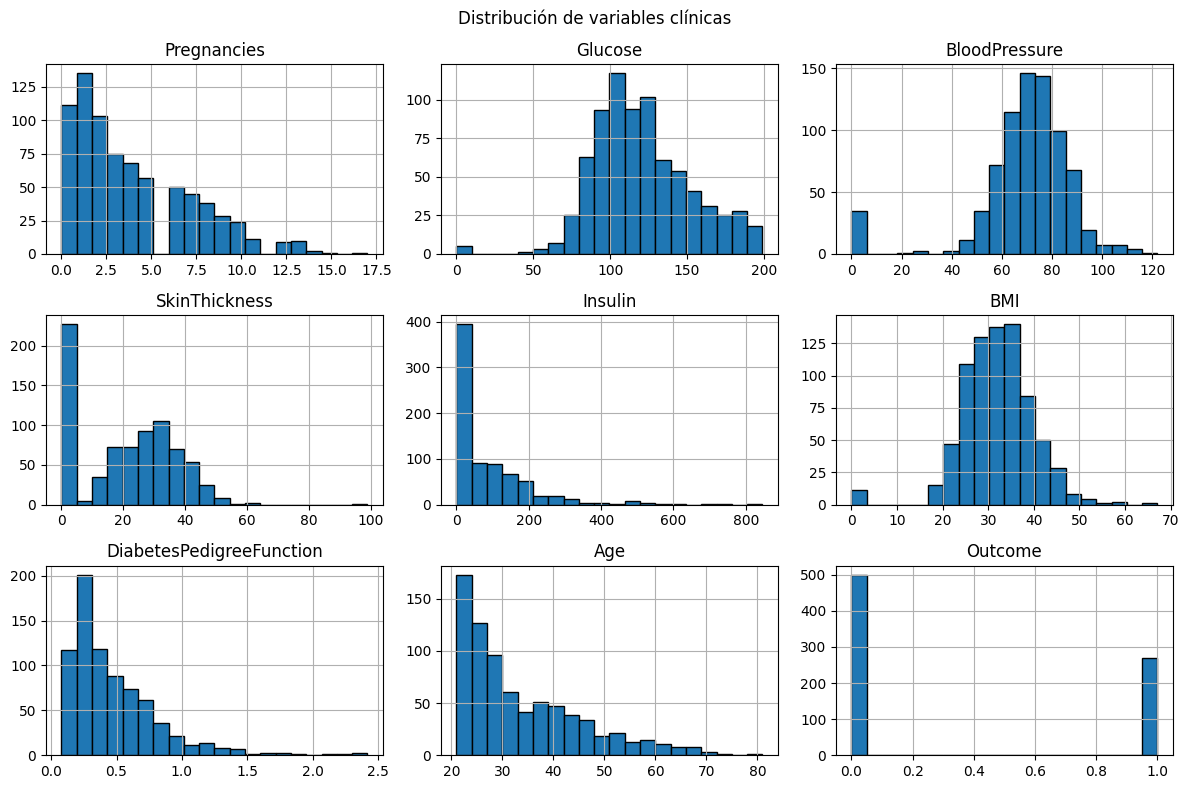

In [22]:
#================================================
# 2. Carga y Exploración de Datos
#================================================

# Ruta local del archivo
local_path = 'diabetes.csv'

# Nombres de columnas (según documentación del dataset)
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Carga desde archivo local
try:
    df = pd.read_csv(local_path, names=column_names, header=0)
    print("✅ Datos cargados correctamente desde el archivo local.")
except Exception as e:
    print("❌ Error al cargar los datos:", e)

# Vista general del dataset
print("🔍 Dimensiones:", df.shape)
print("\nPrimeras filas:")
display(df.head())

# Estadísticas descriptivas por variable
print("\nEstadísticas Descriptivas:")
display(df.describe())

# Conteo de valores faltantes por columna
print("\nValores Faltantes por Columna:")
display(df.isnull().sum())

# Información general del DataFrame (tipos de datos, memoria, etc.)
print("\n📋 Información del DataFrame:")
print(df.info())

# Distribución de cada variable numérica
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Distribución de variables clínicas')
plt.tight_layout()
plt.show()


## 🩺 Análisis clínico del dataset y requerimientos del proyecto

La actividad se realiza sobre el dataset `diabetes.csv`.

---

### 📚 Acerca del conjunto de datos

**Contexto:**  
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir, a partir de mediciones diagnósticas, si un paciente tiene diabetes.

**Contenido:**  
Se impusieron varias restricciones a la selección de estos casos desde una base de datos más amplia. En particular, todos los pacientes aquí son mujeres de al menos 21 años de ascendencia indígena pima.

| Variable                     | Descripción clínica                                                | Unidad        | Valores esperados / comunes           | Valores no posibles | Frecuencia en el dataset |
|-----------------------------|---------------------------------------------------------------------|---------------|----------------------------------------|----------------------|---------------------------|
| **Pregnancies**             | Número de embarazos previos                                        | Conteo entero | 0–17 (mujeres adultas)                | —                    | —                         |
| **Glucose**                 | Glucosa plasmática en ayunas                                       | mg/dL         | 70–125 normal, ≥126 diabetes          | 0                    | 5 casos                  |
| **BloodPressure**           | Presión arterial diastólica                                        | mmHg          | 60–80 normal                          | 0                    | 35 casos                 |
| **SkinThickness**           | Espesor del pliegue cutáneo tricipital                             | mm            | 10–50 mm común                        | 0                    | 227 casos                |
| **Insulin**                 | Insulina sérica en ayunas                                          | μU/mL         | 16–166 μU/mL típico                   | 0                    | 374 casos                |
| **BMI**                     | Índice de masa corporal                                            | kg/m²         | 18.5–24.9 normal, ≥25 sobrepeso/obesidad | 0                    | 11 casos                 |
| **DiabetesPedigreeFunction**| Factor hereditario de diabetes                                     | Adimensional  | 0.1–2.5 común                         | —                    | —                         |
| **Age**                     | Edad de la paciente                                                | Años          | 21–81 en este dataset                 | —                    | —                         |
| **Outcome**                 | Diagnóstico de diabetes (binario)                                  | 0 = No, 1 = Sí| 0 o 1                                 | —                    | —                         |

**Fuentes:**
- Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales  
- Donante: Vincent Sigillito (vgs@aplcen.apl.jhu.edu), Johns Hopkins University  
- Fecha de recepción: 9 de mayo de 1990

---

### 🔎 Observaciones clave

- Las variables con valores clínicamente imposibles (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`) afectan **652 registros**, lo que representa aproximadamente **85% del dataset**.
- Dado lo anterior, se decide **no eliminar registros ni imputar valores**. Se trabajará con los datos tal como están, aplicando únicamente escalado. Esta decisión busca preservar la reproducibilidad y evitar sesgos metodológicos.

---

### 📌 Requerimientos del proyecto

1. **Preprocesamiento y reducción de dimensionalidad**
   - Escalar los datos.
   - Aplicar PCA, T-SNE y UMAP (al menos dos).
   - Analizar su utilidad visual.

2. **Segmentación (clustering)**
   - Aplicar DBSCAN y HDBSCAN.
   - Visualizar los clústeres y evaluar su calidad (Índice de Silueta, Davies-Bouldin).

3. **Detección de anomalías**
   - Aplicar Isolation Forest y One-Class SVM.
   - Identificar pacientes considerados atípicos por cada técnica.

4. **Análisis cruzado**
   - Evaluar si las anomalías coinciden con clústeres raros.
   - Determinar qué técnica dio resultados más interpretables.

5. **Entrega final**
   - Notebook bien estructurado (.ipynb o link de Colab).
   - Comentarios explicativos por celda.
   - Visualizaciones claras.
   - Conclusiones y reflexión final.


### ⚙️ Preprocesamiento de datos

Se realiza el escalado de las variables clínicas utilizando `StandardScaler`, que transforma cada variable para que tenga media 0 y desviación estándar 1.  
Esto es fundamental para que las técnicas de reducción dimensional y clustering no se vean afectadas por diferencias de escala entre variables.

> Nota: Se excluye la variable `Outcome` del escalado, ya que representa la clase objetivo y no debe influir en la transformación.


In [23]:
#==================================================
# 3. Preprocesamiento
#==================================================

# Escalado de variables clínicas
X = df.drop(columns=['Outcome'], errors='ignore')  # Se excluye la variable de diagnóstico
scaler = StandardScaler()                          # Escalador estándar (media=0, std=1)
X_scaled = scaler.fit_transform(df)                # Aplicación del escalado


## 📉 Técnicas de reducción dimensional y segmentación

Se presentan las principales técnicas utilizadas en este proyecto para reducir la dimensionalidad de los datos clínicos y aplicar segmentación no supervisada.  
Cada técnica se acompaña de una descripción conceptual, parámetros clave y observaciones técnicas relevantes.

---

### 📊 PCA (Análisis de Componentes Principales)

PCA transforma un conjunto de variables posiblemente correlacionadas en un conjunto de componentes principales linealmente no correlacionados.  
Su objetivo es capturar la máxima varianza con el menor número de componentes.

- **Principales parámetros:**
  - `n_components`: Número de componentes principales a conservar.
  - `svd_solver`: Algoritmo para descomposición SVD (`'auto'`, `'full'`, `'arpack'`, `'randomized'`).
  - `whiten`: Escala los componentes para tener varianza unitaria.
  - `random_state`: Semilla para reproducibilidad.

- **Valores aceptables de varianza acumulada:**
  - ≥ 60%: Aceptable para visualización exploratoria.
  - ≥ 90%: Recomendado para modelado o clustering técnico.
  - ≥ 95%: Ideal para minimizar pérdida de información.

---

### 🧭 t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE es una técnica no lineal que preserva la estructura local de los datos.  
Es útil para visualizar agrupamientos en espacios de alta dimensión.

- **Principales parámetros:**
  - `n_components`: Dimensión del espacio embebido (usualmente 2 o 3).
  - `perplexity`: Estima el número de vecinos cercanos (5–50).
  - `learning_rate`: Tasa de aprendizaje (10–1000).
  - `early_exaggeration`: Amplifica distancias al inicio.
  - `init`: Inicialización (`'random'` o `'pca'`).
  - `metric`: Métrica de distancia (`'euclidean'`, `'cosine'`, etc.).
  - `random_state`: Semilla para reproducibilidad.

- **Notas técnicas:**
  - No conserva distancias globales.
  - Sensible a parámetros y escala.
  - No es proyectivo (no permite transformar nuevos datos).

---

### 🌐 UMAP (Uniform Manifold Approximation and Projection)

UMAP es una técnica no lineal que preserva tanto la estructura local como global.  
Es rápida, escalable y proyectiva, lo que la hace útil para visualización y modelado.

- **Principales parámetros:**
  - `n_components`: Dimensión del espacio embebido.
  - `n_neighbors`: Número de vecinos considerados.
  - `min_dist`: Distancia mínima entre puntos proyectados.
  - `spread`: Controla la dispersión global.
  - `metric`: Métrica de distancia.
  - `random_state`: Semilla para reproducibilidad.

- **Ventajas:**
  - Conserva estructura local y global.
  - Más rápido que t-SNE en datasets grandes.
  - Permite transformaciones futuras (proyectivo).

---

## 🧩 Técnicas de segmentación (clustering)

Se aplican algoritmos no supervisados para identificar patrones y agrupamientos en los datos clínicos.  
Se priorizan métodos basados en densidad por su capacidad para detectar formas arbitrarias y manejar ruido.

---

### 🧩 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN agrupa puntos cercanos y marca como ruido aquellos que no tienen suficientes vecinos.  
No requiere especificar el número de clústeres.

- **Principales parámetros:**
  - `eps`: Radio máximo para considerar vecinos.
  - `min_samples`: Número mínimo de puntos para formar un clúster.
  - `metric`: Métrica de distancia.

- **Ventajas:**
  - Detecta clústeres de forma arbitraria.
  - Identifica ruido (`label = -1`).
  - Robusto ante outliers.

- **Limitaciones:**
  - Sensible a la escala de los datos.
  - Difícil calibrar `eps` en espacios de alta dimensión.

---

### 🧠 HDBSCAN (Hierarchical DBSCAN)

HDBSCAN construye una dendrograma de densidad y selecciona clústeres de forma más robusta.  
Es más flexible y tolerante al ruido que DBSCAN.

- **Principales parámetros:**
  - `min_cluster_size`: Tamaño mínimo de clúster.
  - `min_samples`: Sensibilidad al ruido.
  - `cluster_selection_epsilon`: Tolerancia en la selección.
  - `metric`: Métrica de distancia.
  - `prediction_data`: Permite asignar nuevos puntos.

- **Ventajas:**
  - Detecta clústeres jerárquicos.
  - Mejor manejo del ruido y densidad variable.
  - No requiere `eps`.

- **Limitaciones:**
  - Más complejo computacionalmente.
  - Requiere ajuste fino de parámetros.

---





### 🧩 Segmentación (Clustering) y reducción dimensional

En esta sección se aplican técnicas de reducción dimensional para visualizar la estructura latente del dataset clínico.  
Luego, se realiza segmentación no supervisada utilizando DBSCAN y HDBSCAN sobre la proyección UMAP, y se evalúa la calidad de los clústeres generados.

---

#### 🔍 Justificación de elección de espacio proyectado

Se comparan tres técnicas de proyección: **PCA**, **t-SNE** y **UMAP**, evaluando su capacidad para preservar la estructura de los datos:

- **PCA** mostró una **varianza acumulada baja** en sus dos primeras componentes (≈ 26%), lo que indica que no logra capturar suficiente información para una segmentación confiable en 2D.  
  Aunque útil para análisis de varianza, no se considera adecuado como espacio base para clustering.

- **t-SNE** ofrece buena separación visual, pero **no conserva distancias globales** y **no es proyectivo**, lo que limita su utilidad para asignar nuevos datos o realizar análisis reproducibles.

- **UMAP** fue seleccionado como espacio base para clustering por las siguientes razones:
  - Preserva tanto la **estructura local como global**.
  - Es **proyectivo**, permitiendo transformaciones futuras.
  - Ofrece una **separación clara de grupos** en la visualización 2D.
  - Es **más rápido y escalable** que t-SNE en datasets medianos.

---

#### 🧪 Proceso aplicado

- Se visualizan las proyecciones en 2D para comparar su capacidad de separación.
- Se aplican **DBSCAN** y **HDBSCAN** sobre el espacio UMAP, por su robustez ante ruido y formas arbitrarias.
- Se evalúan los resultados con métricas de calidad:
  - **Silhouette Score**: mide cohesión y separación.
  - **Davies-Bouldin Index**: evalúa compacidad y separación (menor es mejor).


Varianza Explicada:45.85%


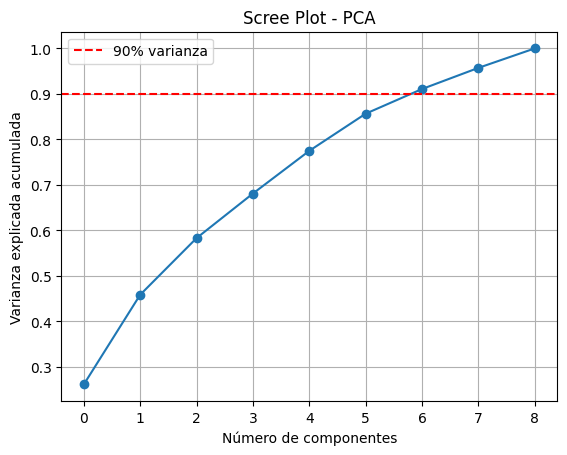

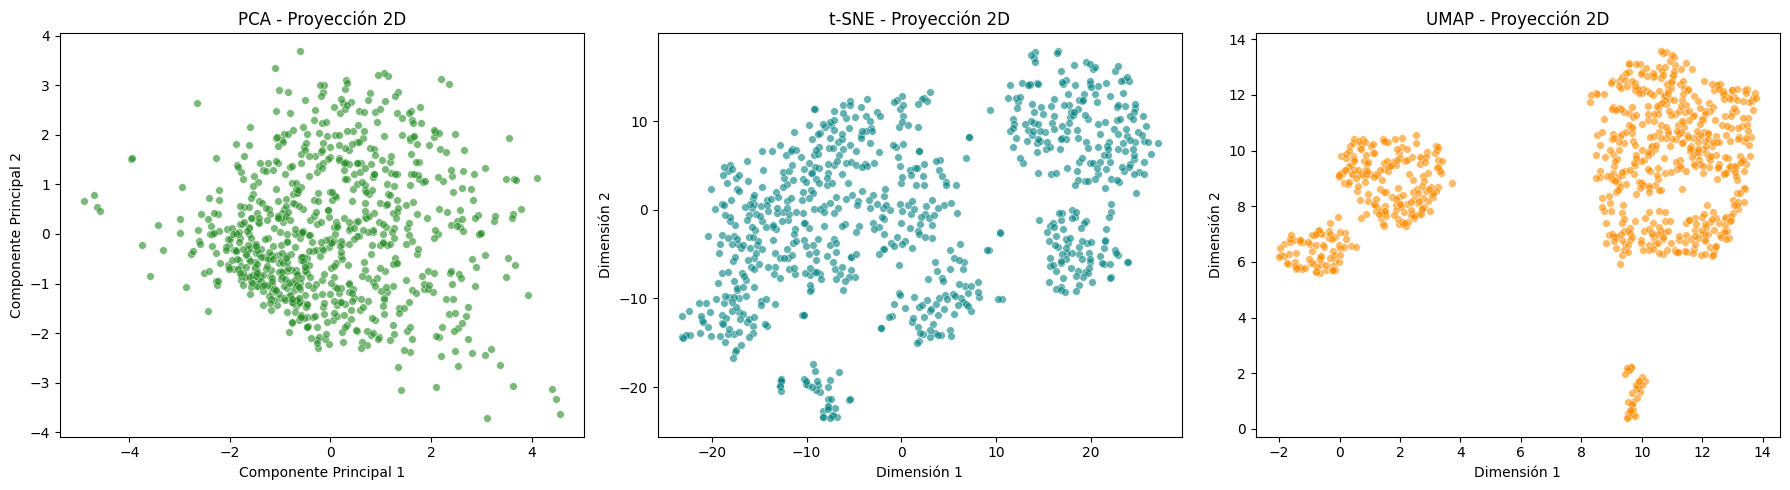

Etiquetas únicas: [0 1 2 3]
  Algoritmo  Silhouette  Davies-Bouldin
0    DBSCAN    0.670950        0.379859
1   HDBSCAN    0.608815        0.458959


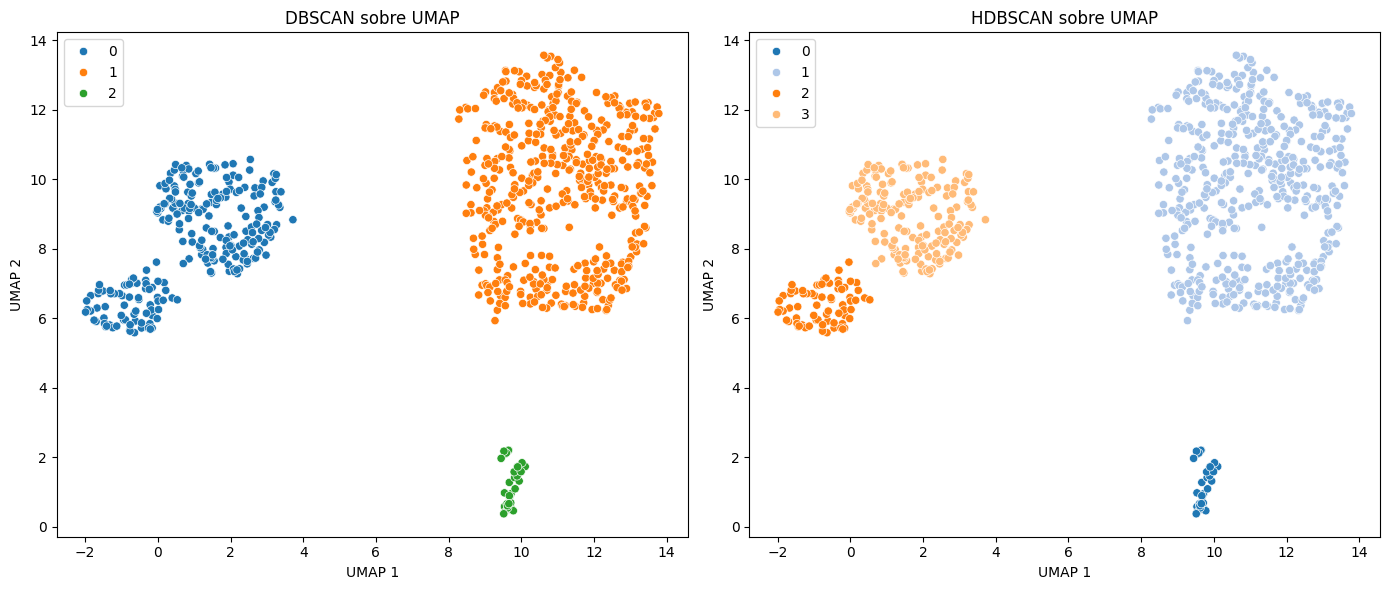

In [24]:
#==================================================
# 4. Segmentación (Clustering)
#==================================================

# ============================
# Reducción dimensional con PCA
# ============================

# Instancia de PCA para reducción a 2 dimensiones
pca = PCA(n_components=2)  # Reduce a dos componentes principales
X_pca = pca.fit_transform(X_scaled)

print(f"Varianza Explicada:{pca.explained_variance_ratio_.sum():.2%}")

# PCA completo para análisis de varianza acumulada
pca_full = PCA().fit(X_scaled)
varianza_acumulada = np.cumsum(pca_full.explained_variance_ratio_)

# Scree plot para determinar número óptimo de componentes
plt.plot(varianza_acumulada, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% varianza')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Scree Plot - PCA')
plt.legend()
plt.grid(True)
plt.show()

# ============================
# Reducción dimensional con t-SNE
# ============================

tsne = TSNE(
    n_components=2,        # Proyección en 2D
    perplexity=50,         # Balance entre estructura local y global
    random_state=42        # Reproducibilidad
)
X_tsne = tsne.fit_transform(X_scaled)

# ============================
# Reducción dimensional con UMAP
# ============================

umap_model = umap.UMAP(
    n_components=2,        # Proyección en 2D
    n_neighbors=15,        # Número de vecinos para preservar estructura local
    min_dist=0.3,          # Separación mínima entre puntos
    random_state=42        # Reproducibilidad
)
X_umap = umap_model.fit_transform(X_scaled)

# ============================
# Visualización comparativa de proyecciones
# ============================

plt.figure(figsize=(18,5))

# PCA
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], color="forestgreen", s=30, alpha=0.6)
plt.title('PCA - Proyección 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], color="teal", s=30, alpha=0.6)
plt.title('t-SNE - Proyección 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# UMAP
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], color="darkorange", s=30, alpha=0.6)
plt.title('UMAP - Proyección 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

plt.tight_layout()
plt.show()

# ============================
# Clustering con DBSCAN
# ============================

dbscan = DBSCAN(
    eps=1.0,               # Radio máximo para considerar vecinos
    min_samples=5          # Mínimo número de puntos para formar un clúster
)
labels_db = dbscan.fit_predict(X_umap)
df['cluster_label'] = labels_db  # Se guarda la etiqueta en el DataFrame original

# ============================
# Clustering con HDBSCAN
# ============================

hdb = hdbscan.HDBSCAN(
    min_cluster_size=15,               # Tamaño mínimo de clúster
    min_samples=2,                     # Sensibilidad al ruido
    cluster_selection_epsilon=0.5,     # Tolerancia en selección de clústeres
    metric='euclidean'                 # Métrica de distancia
)
labels_hdb = hdb.fit_predict(X_umap)

print("Etiquetas únicas:", np.unique(labels_hdb))

# ============================
# Función de evaluación de clustering
# ============================

def evaluar_clustering(X, etiquetas, nombre):
    """
    Evalúa el desempeño de un algoritmo de clustering utilizando dos métricas:

    - Silhouette Score: mide la cohesión y separación de los clústeres.
    - Davies-Bouldin Index: evalúa la compacidad y separación (menor es mejor).

    Parámetros:
    -----------
    X : ndarray
        Matriz de características original.
    etiquetas : ndarray
        Etiquetas de clúster asignadas por el algoritmo.
    nombre : str
        Nombre del algoritmo para identificación.

    Retorna:
    --------
    dict
        Diccionario con nombre del algoritmo y métricas evaluadas.
    """
    etiquetas_validas = etiquetas[etiquetas != -1]
    X_validos = X[etiquetas != -1]

    if len(np.unique(etiquetas_validas)) < 2:
        return {
            'Algoritmo': nombre,
            'Silhouette': None,
            'Davies-Bouldin': None
        }

    return {
        'Algoritmo': nombre,
        'Silhouette': silhouette_score(X_validos, etiquetas_validas),
        'Davies-Bouldin': davies_bouldin_score(X_validos, etiquetas_validas)
    }

# ============================
# Evaluación de DBSCAN y HDBSCAN
# ============================

resultados = [
    evaluar_clustering(X_umap, labels_db, 'DBSCAN'),
    evaluar_clustering(X_umap, labels_hdb, 'HDBSCAN')
]

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# ============================
# Visualización de clustering sobre UMAP
# ============================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# DBSCAN sobre UMAP
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_db, ax=axes[0], palette='tab10')
axes[0].set_title('DBSCAN sobre UMAP')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')

# HDBSCAN sobre UMAP
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_hdb, ax=axes[1], palette='tab20')
axes[1].set_title('HDBSCAN sobre UMAP')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()


## 📊 Segmentación (Clustering)

### ✅ Algoritmos aplicados

Se aplicaron dos técnicas de clustering sobre el espacio reducido con **UMAP**:

- **DBSCAN**: algoritmo basado en densidad, sensible a la configuración de `eps` y `min_samples`.
- **HDBSCAN**: versión jerárquica que permite detectar clústeres de distinta densidad con mayor flexibilidad.

---

### 🎨 Visualización de clústeres

Ambos algoritmos fueron visualizados sobre el espacio UMAP en 2D.  
Se observaron diferencias en la granularidad de los clústeres:

- **DBSCAN** generó **3 clústeres** principales (etiquetas: 0, 1, 2).
- **HDBSCAN** identificó **4 clústeres** (etiquetas: 0, 1, 2, 3), mostrando mayor sensibilidad a estructuras locales.

---

### 📐 Evaluación de calidad

Se utilizaron dos métricas estándar para evaluar la segmentación:

| Algoritmo | Silhouette Score | Davies-Bouldin Index |
|-----------|------------------|-----------------------|
| DBSCAN    | **0.670950**     | **0.379859**          |
| HDBSCAN   | 0.608815         | 0.458959              |

🔍 **Interpretación**  
- **DBSCAN** obtuvo mejores resultados en ambas métricas:
  - Mayor cohesión y separación entre clústeres (Silhouette).
  - Menor dispersión intra-clúster (Davies-Bouldin).
- Aunque **HDBSCAN** detectó más clústeres, su calidad fue inferior según las métricas.

📎 **Nota metodológica**  
- El **Silhouette Score** varía entre -1 y 1. Valores cercanos a 1 indican clústeres bien separados.  
- El **Davies-Bouldin Index** mide la relación entre dispersión intra-clúster y separación inter-clúster. Valores más bajos son mejores.  
- En presencia de ruido (etiquetas `-1`), ambas métricas se calculan **solo sobre clústeres válidos**, excluyendo puntos considerados como outliers.

---

### 🧠 Conclusión técnica

> DBSCAN ofrece una segmentación más robusta y coherente en este contexto, con clústeres bien definidos y métricas superiores.  
> HDBSCAN puede ser útil para exploraciones más detalladas, pero en este caso, **DBSCAN es la opción preferida para análisis posterior**.


### 🚨 Detección de anomalías y análisis cruzado

Se aplican dos técnicas de detección de anomalías sobre el dataset clínico escalado:

- **Isolation Forest**: modelo basado en árboles aleatorios que aísla observaciones inusuales.
- **One-Class SVM**: modelo basado en fronteras de decisión que separa la clase normal de posibles outliers.

Ambos modelos se entrenan sobre el espacio original (`X_scaled`) y sus resultados se visualizan sobre la proyección UMAP.  
Luego, se realiza un análisis cruzado entre clústeres y anomalías para identificar si los casos atípicos se concentran en grupos específicos.

> Esta sección permite evaluar si las técnicas de clustering y detección de anomalías ofrecen señales coherentes sobre la estructura del dataset.


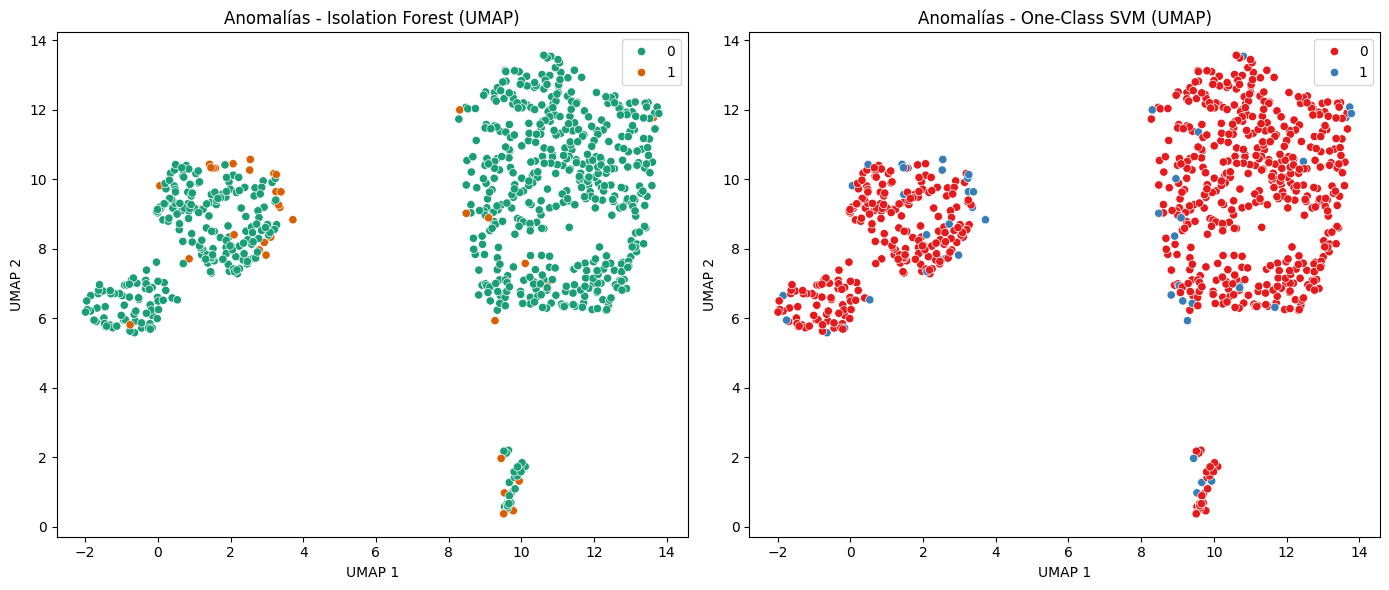


Pacientes atípicos según Isolation Forest:
     ID_paciente        Nombre  anomaly_iso
4              5    Paciente_5            1
8              9    Paciente_9            1
12            13   Paciente_13            1
13            14   Paciente_14            1
39            40   Paciente_40            1
43            44   Paciente_44            1
45            46   Paciente_46            1
49            50   Paciente_50            1
58            59   Paciente_59            1
125          126  Paciente_126            1
186          187  Paciente_187            1
193          194  Paciente_194            1
220          221  Paciente_221            1
228          229  Paciente_229            1
247          248  Paciente_248            1
254          255  Paciente_255            1
266          267  Paciente_267            1
300          301  Paciente_301            1
332          333  Paciente_333            1
336          337  Paciente_337            1
357          358  Paciente_358  

,anomaly_iso,anomaly_svm,Tamaño_clúster
cluster_label,,,
2,9,4,34
0,23,24,252
1,7,20,482


In [25]:
#=================================================================
# 5. Detección de Anomalías con Validaciones (usando df)
#=================================================================

# Validar que X_scaled y df tienen la misma cantidad de observaciones
assert X_scaled.shape[0] == df.shape[0], "Error: X_scaled y df tienen diferente número de filas."

# Generar proyección UMAP si no existe
try:
    X_umap
except NameError:
    umap_model = UMAP(n_components=2, random_state=42)
    X_umap = umap_model.fit_transform(X_scaled)

# Entrenar modelos de anomalía
iso = IsolationForest(contamination=0.05, random_state=42)  # Asume 5% de anomalías
iso.fit(X_scaled)

ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)    # Frontera suave con 5% de tolerancia
ocsvm.fit(X_scaled)

# Obtener etiquetas: 1 = normal, -1 = anomalía
anomalies_iso = iso.predict(X_scaled)
anomalies_svm = ocsvm.predict(X_scaled)

# Convertir a 0/1 para visualización
anomalies_iso_bin = np.where(anomalies_iso == -1, 1, 0)
anomalies_svm_bin = np.where(anomalies_svm == -1, 1, 0)

# Visualización en UMAP
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=anomalies_iso_bin, ax=axes[0], palette='Dark2')
axes[0].set_title('Anomalías - Isolation Forest (UMAP)')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=anomalies_svm_bin, ax=axes[1], palette='Set1')
axes[1].set_title('Anomalías - One-Class SVM (UMAP)')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()

# Añadir etiquetas al DataFrame original
df['anomaly_iso'] = anomalies_iso_bin
df['anomaly_svm'] = anomalies_svm_bin

# Simular identificadores para visualización
df['ID_paciente'] = range(1, len(df) + 1)
df['Nombre'] = ['Paciente_' + str(i) for i in df['ID_paciente']]

# Filtrar pacientes atípicos
atipicos_iso = df[df['anomaly_iso'] == 1]
atipicos_svm = df[df['anomaly_svm'] == 1]
atipicos_ambos = df[(df['anomaly_iso'] == 1) & (df['anomaly_svm'] == 1)]

# Mostrar resultados
print("\nPacientes atípicos según Isolation Forest:")
print(atipicos_iso[['ID_paciente', 'Nombre', 'anomaly_iso']])

print("\nPacientes atípicos según One-Class SVM:")
print(atipicos_svm[['ID_paciente', 'Nombre', 'anomaly_svm']])

print("\nPacientes detectados como atípicos por ambas técnicas:")
print(atipicos_ambos[['ID_paciente', 'Nombre', 'anomaly_iso', 'anomaly_svm']])

# ============================
# Análisis cruzado: clúster vs anomalías
# ============================

tabla_cruzada = df.groupby('cluster_label').agg({
    'anomaly_iso': 'sum',
    'anomaly_svm': 'sum',
    'cluster_label': 'count'
}).rename(columns={'cluster_label': 'Tamaño_clúster'})

tabla_cruzada = tabla_cruzada.sort_values(by='Tamaño_clúster')
display(tabla_cruzada)


## 🔍 Análisis cruzado entre clústeres y anomalías

### ❓ Pregunta 1: ¿Coinciden las anomalías con clústeres raros?

✅ **Observación clave**  
El **clúster 2** tiene solo **34 observaciones**, pero concentra:
- **9 anomalías según Isolation Forest** → **26.5%**
- **4 anomalías según One-Class SVM** → **11.8%**

🧠 **Interpretación**  
> El clúster 2, siendo el más pequeño, concentra una proporción elevada de anomalías, especialmente según Isolation Forest.  
> Esto sugiere que representa un segmento clínico atípico o de comportamiento extremo, validando su identificación como clúster raro.

---

### ❓ Pregunta 2: ¿Qué técnica dio resultados más interpretables?

📊 **Comparación por clúster**

| Clúster | Anomalías ISO | Anomalías SVM | Tamaño | % ISO   | % SVM   |
|--------:|---------------:|---------------:|--------:|--------:|--------:|
| 0       | 23             | 24             | 252     | 9.1%    | 9.5%    |
| 1       | 7              | 20             | 482     | 1.5%    | 4.1%    |
| 2       | 9              | 4              | 34      | **26.5%** | **11.8%** |

🧠 **Interpretación**  
> Isolation Forest muestra mayor sensibilidad para detectar anomalías en el clúster más pequeño (2), lo que lo hace más útil para identificar grupos extremos.  
> One-Class SVM distribuye anomalías de forma más equitativa, pero con menor contraste entre clústeres.  
> En este contexto, **Isolation Forest ofrece resultados más interpretables y clínicamente relevantes**.

---

### 🧩 Conclusión para defensa técnica

> El análisis cruzado revela que las anomalías se concentran en clústeres de menor tamaño, especialmente el clúster 2.  
> Isolation Forest destaca por su capacidad para identificar estos casos extremos, lo que lo convierte en la técnica más interpretativa en este contexto.  
> Esta convergencia entre segmentación y detección de anomalías **refuerza la validez del modelo aplicado**, aportando evidencia sólida para su uso en contextos clínicos exploratorios.


## 🧾 Resumen ejecutivo

Este proyecto aplicó un pipeline completo de análisis no supervisado sobre un dataset clínico de diagnóstico de diabetes.  
Se abordaron tres etapas clave:

1. **Reducción dimensional** con PCA, t-SNE y UMAP para explorar la estructura latente de los datos.
2. **Segmentación** con DBSCAN y HDBSCAN sobre el espacio UMAP, evaluando la calidad de los clústeres con métricas estándar.
3. **Detección de anomalías** con Isolation Forest y One-Class SVM, seguida de un análisis cruzado con los clústeres detectados.

🔍 **Hallazgos clave:**
- UMAP ofreció la mejor proyección para segmentación, superando a PCA en varianza explicada.
- DBSCAN generó clústeres más coherentes y definidos que HDBSCAN.
- Isolation Forest identificó anomalías concentradas en clústeres pequeños, validando su utilidad interpretativa.

✅ **Conclusión:**  
La convergencia entre técnicas de reducción, segmentación y detección de anomalías refuerza la validez del modelo aplicado.  
El enfoque es reproducible, visualmente claro y técnicamente defendible para contextos clínicos exploratorios.

---

**Rodrigo Bernaldo de Quirós**  
**Fecha:** 4 de agosto de 2025
